In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import *
from dtk.process import butterworth
from row_filter.detect_peaks import * 
#from scipy import *
import seaborn as sns


#Custom Functions
import row_filter.clean_data as cd
import row_filter.clean_data_stroke_accy as cds
import row_filter.kalman as kf
import row_filter.complementary as cf

%matplotlib inline

In [2]:
# olympian Scull DGPS
df_dgps1 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-104956.csv") #16N #issue
# df_dgps2 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-104427.csv")
# df_dgps3 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-105906.csv")
# df_dgps4 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-105358.csv")
# df_dgps5 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-110625.csv") #24N #issue
# df_dgps6 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-110303.csv")
# df_dgps7 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-111307.csv")
# df_dgps8 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-110951.csv")
# df_dgps9 = pd.read_csv("row_data/elite/diffGPS/baseline_log_20180422-111703.csv") #34S #issue

df_dgps1.pc_time = ["2018-04-22 10:" + item for item in df_dgps1.pc_time]
df_dgps1.gps_time = ["2018-04-22 17:" + item for item in df_dgps1.gps_time]
# df_dgps5.pc_time = ["2018-04-22 11:" + item for item in df_dgps5.pc_time]
# df_dgps5.gps_time = ["2018-04-22 18:" + item for item in df_dgps5.gps_time]
# df_dgps9.pc_time = ["2018-04-22 11:" + item for item in df_dgps9.pc_time]
# df_dgps9.gps_time = ["2018-04-22 18:" + item for item in df_dgps9.gps_time]

# # #club-level Scull DGPS
# df2_dgps1 = pd.read_csv("row_data/club-level/diffGPS/log1_baseline_log_20180420-090601.csv") #20N
# df2_dgps2 = pd.read_csv("row_data/club-level/diffGPS/log4_baseline_log_20180420-091604.csv") #22N
# df2_dgps3 = pd.read_csv("row_data/club-level/diffGPS/log2_baseline_log_20180420-091022.csv") #22S   #issue
# df2_dgps4 = pd.read_csv("row_data/club-level/diffGPS/log8_baseline_log_20180420-092443.csv") #24N
# df2_dgps5 = pd.read_csv("row_data/club-level/diffGPS/log6_baseline_log_20180420-092004.csv") #24S
# df2_dgps6 = pd.read_csv("row_data/club-level/diffGPS/log12_baseline_log_20180420-093324.csv") #26N
# df2_dgps7 = pd.read_csv("row_data/club-level/diffGPS/log10_baseline_log_20180420-092925.csv") #26S

# df2_dgps3.pc_time = ["2018-04-20 09:" + item for item in df2_dgps3.pc_time]
# df2_dgps3.gps_time = ["2018-04-20 16:" + item for item in df2_dgps3.gps_time]

In [3]:
#Plot
df_phone = pd.read_csv("row_data/elite/iPhone/Boat-20180422T103229_1641_rpc364_data_1CLX_1_B_2CDF0487-83FC-45CC-B590-FF42D74E0D6D.csv")
df_phone, df_acc, df_dgps = cd.clean_data(df_phone, df_dgps1)
df_kalman = kf.compute(df_phone,df_acc)
df_comp = cf.ton_ext(df_phone)
df_stroke, stroke_idx = cds.stroke_data(df_phone, df_kalman, df_comp, df_dgps, 'dgps_stamp')

In [4]:
#These are where the stroke starts
stroke_idx.astype(int)

array([  57,  414,  768, 1103, 1476, 1830, 2198, 2549, 2898, 3257, 3605,
       3952, 4301, 4645, 4994, 5338, 5682, 6008, 6345, 6681, 7031])

### Plotting

In [5]:

df_kalman['filter_type'] = 'KF'
df_comp['filter_type'] = 'CF'
#DiffGPS Dataframe 
df_diffgps = pd.DataFrame()
df_diffgps['log_time'] = df_phone.log_time
df_diffgps['position'] = df_dgps.pos - df_dgps.pos[0]
df_diffgps['velocity'] = df_dgps.speed
df_diffgps['filter_type'] = 'DGPS'
# df_diffgps['rel_pos'] = 0
# df_diffgps['speed_err'] = 0
#Phone Dataframe
df_phone1 = pd.DataFrame()
df_phone1['log_time'] = df_phone.log_time
df_phone1['position'] = df_phone.y_boat - df_phone.y_boat[0] 
df_phone1['velocity'] = df_phone.location_speed
df_phone1['filter_type'] = 'SP'
df_phone1['rel_pos'] = (df_phone1.position - df_diffgps.position)
df_phone1['speed_err'] = (df_phone1.velocity - df_diffgps.velocity)
#CF Dataframe
df_comp['rel_pos'] = (df_comp.position - df_diffgps.position)
df_comp['speed_err'] = (df_comp.velocity - df_diffgps.velocity)
#KF Dataframe
df_kalman['rel_pos'] = (df_kalman.position - df_diffgps.position)
df_kalman['speed_err'] = (df_kalman.velocity - df_diffgps.velocity)
#Stroke index
# df_index[]

In [6]:
df_dgps.head()

unix_time  north(meters)  east(meters)       pos  distance     speed
0  1.524419e+09     124.480156      3.128793 -0.218337 -0.218337  2.464023
1  1.524419e+09     124.479132      3.129717 -0.216958 -0.216958  2.464023
2  1.524419e+09     124.461088      3.145986 -0.192662 -0.192662  2.464023
3  1.524419e+09     124.442696      3.162569 -0.167899 -0.167899  2.464023
4  1.524419e+09     124.420206      3.182847 -0.137616 -0.137616  2.464023

In [8]:
frames = [df_phone1, df_comp[0:-10], df_kalman]
all_run = pd.concat(frames, ignore_index=True, sort = True)
all_run['time'] = all_run.log_time - all_run.log_time[0]
frames1 = [df_diffgps,df_phone1, df_comp[0:-10], df_kalman]
all_run1 = pd.concat(frames1, ignore_index=True, sort = True)
all_run1['time'] = all_run1.log_time - all_run1.log_time[0]

In [9]:
# Find the start of stroke times
df_stroketimes = df_phone.iloc[stroke_idx]
stroke_times = df_stroketimes.log_time.values - all_run.log_time[0]
stroke_times = stroke_times[np.where((stroke_times > 30) & (stroke_times < 60), True, False)]
stroke_interp = interp1d(df_diffgps.log_time.values-all_run.log_time[0], df_diffgps['position'],
                            fill_value='extrapolate')
stroke_dgps_points = stroke_interp(stroke_times)

array([32.61003995, 36.08775997, 39.57543993, 43.06324983, 46.50101995,
       50.02516985, 53.45925999, 56.89432979])

In [10]:
all_run_slice = all_run[all_run.time > 30]
all_run_slice = all_run_slice[all_run_slice.time < 60]
all_run_slice1 = all_run1[all_run1.time > 30]
all_run_slice1 = all_run_slice1[all_run_slice1.time < 60]

In [11]:
def findRMSE(err):
    RMSE = np.sqrt(np.mean(np.square(err)))
    return RMSE

In [12]:
cf_RMSE_pos = findRMSE(all_run_slice[all_run_slice.filter_type =='CF'].rel_pos)
kf_RMSE_pos = findRMSE(all_run_slice[all_run_slice.filter_type =='KF'].rel_pos)
phone_RMSE_pos = findRMSE(all_run_slice[all_run_slice.filter_type =='SP'].rel_pos)
cf_RMSE_vel = findRMSE(all_run_slice[all_run_slice.filter_type =='CF'].speed_err)
kf_RMSE_vel = findRMSE(all_run_slice[all_run_slice.filter_type =='KF'].speed_err)
phone_RMSE_vel = findRMSE(all_run_slice[all_run_slice.filter_type =='SP'].speed_err)

In [13]:
print(cf_RMSE_vel, kf_RMSE_vel, phone_RMSE_vel)

0.3038031478240584 0.21812356091613472 0.48321340056766565


In [ ]:
# muted palette color codes: ["#4878D0", "#EE854A", "#6ACC64", "#D65F5F", "#956CB4",
#            "#8C613C", "#DC7EC0", "#797979", "#D5BB67", "#82C6E2"]

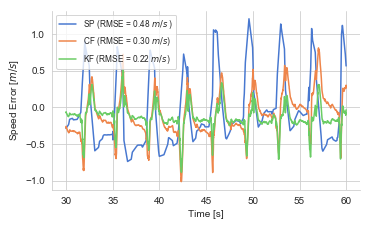

In [14]:
legend = ["SP (RMSE = 0.48 $m/s$ )", "CF (RMSE = 0.30 $m/s$)", "KF (RMSE = 0.22 $m/s$)"]
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.lineplot(x="time", y="speed_err", hue = 'filter_type', palette= ["#4878D0", "#EE854A", "#6ACC64"],
                   data=all_run_slice)
plt.setp(ax.get_legend().get_title(), fontsize='8')
ax.set(xlabel='Time [s]', ylabel='Speed Error [$m/s$]')
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.legend(legend, loc=2,fontsize = 'small')
plt.tight_layout()
fig.savefig('row_data/figures/speed-error.png', dpi=300)

In [15]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.lineplot(x="time", y="velocity",
             hue='filter_type', palette= ["k","#4878D0", "#EE854A", "#6ACC64"],
             data=all_run_slice1)
ax.set(xlabel='Time [s]', ylabel='Boat Speed [m/s]')
ax.set_ylim((1.5, 4.5))
plt.setp(ax.get_legend().get_title(), fontsize='8')
legend = ["DGPS","SP (RMSE = 0.48 $m/s$ )",
          "CF (RMSE = 0.23 $m/s$)",
          "KF (RMSE = 0.22 $m/s$)"]
plt.legend(legend, loc=4, fontsize='small')
plt.tight_layout()
fig.savefig('row_data/figures/speed-example.png', dpi=300)

In [16]:
print(cf_RMSE_pos, kf_RMSE_pos, phone_RMSE_pos)

0.8618645545176773 3.7972386562394966 3.753405790955342


In [17]:
sp_run_slice = all_run_slice1[all_run_slice1['filter_type'] == 'SP']
sp_updates = sp_run_slice[sp_run_slice['position'].diff() > 0]
sp_update_times = np.hstack((sp_run_slice.iloc[0]['time'], sp_updates['time']))
sp_update_dists = np.hstack((sp_run_slice.iloc[0]['position'], sp_updates['position']))
sp_update_dist_errs = np.hstack((sp_run_slice.iloc[0]['rel_pos'], sp_updates['rel_pos']))

In [18]:
stroke_idx

array([  57,  414,  768, 1103, 1476, 1830, 2198, 2549, 2898, 3257, 3605,
       3952, 4301, 4645, 4994, 5338, 5682, 6008, 6345, 6681, 7031])

In [19]:
sns.set_style("whitegrid")
legend = ["SP (RMSE = 3.7 m)", "CF (RMSE = 0.9 m)", "KF (RMSE = 3.8 m)"]
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.lineplot(x="time", y="rel_pos",
             hue = 'filter_type',
             palette= ["#4878D0", "#EE854A", "#6ACC64"],
             data=all_run_slice)
ax.plot(sp_update_times, sp_update_dist_errs,
        linestyle='None', marker='o', markersize=3, color="#4878D0", label='_nolegend_')
plt.setp(ax.get_legend().get_title(), fontsize='8')
ax.set(xlabel='Time [s]', ylabel='Distance Error [m]')
plt.legend(legend, loc=4,fontsize = 'small')
plt.tight_layout()
fig.savefig('row_data/figures/dist-error.png', dpi=300)

In [43]:
sns.set_style("whitegrid")

fig, ax = plt.subplots()
fig.set_size_inches(5.25, 3.24)

sns.lineplot(x="time", y="position", 
             hue='filter_type',
             palette=["k","#4878D0", "#EE854A", "#6ACC64"],
             data=all_run_slice1)

ax.plot(sp_update_times, sp_update_dists,
        linestyle='None', marker='o', markersize=3, color="#4878D0", label='_nolegend_')

ax.plot(stroke_times, stroke_dgps_points,
        linestyle='None', marker='*', markersize=5, color="k", label="Stroke Points")

ax.set(xlabel='Time [s]', ylabel='Boat Distance [m]')

legend = ["DGPS", "SP (RMSE = 3.7 m)", "CF (RMSE = 0.9 m)", "KF (RMSE = 3.8 m)"]
ax.legend(legend, loc=4,fontsize = 'small')

plt.tight_layout()
fig.savefig('row_data/figures/dist-example.png', dpi=300)

In [21]:
print(df_kalman.bias[len(df_kalman)-1])

0.39387502342146946


In [22]:
sns.set_style("whitegrid")
legend = ["Final KF Bias = 0.394 $m/s^2$"]
df_kalman['time'] = df_kalman.log_time - df_kalman.log_time[0]
fig, ax = plt.subplots()
fig.set_size_inches(5.25,3.24)
sns.lineplot(x="time", y="bias",
             palette=["#6ACC64"],
             data=df_kalman)
ax.set_ylim((0.25, 0.75))
ax.set(xlabel='Time [s]', ylabel='KF Bias [$m/s^2$]')
plt.legend(legend, loc=1)
plt.tight_layout()
fig.savefig('row_data/figures/bias-conv.png', dpi=300)